In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# машинный нуль
zero = 2
i = 1
while 2**(-i) != 0:
    zero = 2**(-i)
    i+=1
print(f'Машинный ноль = {zero:.2e}')

Машинный ноль = 4.94e-324


In [3]:
# машинная бесконечность
inf = 1.0
buf = 2.0
while buf*2 != buf:
    inf *= 2
    buf *= 2 
print(f'Машинная бесконечность = {inf:.2e}')

Машинная бесконечность = 8.99e+307


In [4]:
# машинный эпсилон
eps = 1
while 1+eps*0.5 != 1:
    eps*=0.5   
print(f'Машинный эпсилон = {eps:.2e}')

Машинный эпсилон = 2.22e-16


In [5]:
#заданная функция
def F(x):
    return np.sin(x)

# n-ый член ряда
def Taylor(x,n):
    if n==0: 
        return 0
    else:
        return (((-1)**(n-1))*(x**(2*n-1)))
    /(np.math.factorial(2*n-1))
    
#сумма N первых членов ряда
def Sum_Taylor(x,n):
    res = 0.0
    for i in range(1,n+1,1):
        res = res + Taylor(x,i)
    return res

#абсолютная погрешность
def AbsErr(x, n) :
    return np.abs(F(x) - Sum_Taylor(x, n))

#относительная погрешность
def RelErr(x, n) :
    return AbsErr(x,n)/np.abs(Sum_Taylor(x, n))

In [6]:
Sum_Taylor(np.math.pi/2,4)

-16.337913950708717

In [7]:
Taylor(np.math.pi/2,2)

-3.875784585037477

In [8]:
Taylor(np.math.pi/2,3)

9.563115149540044

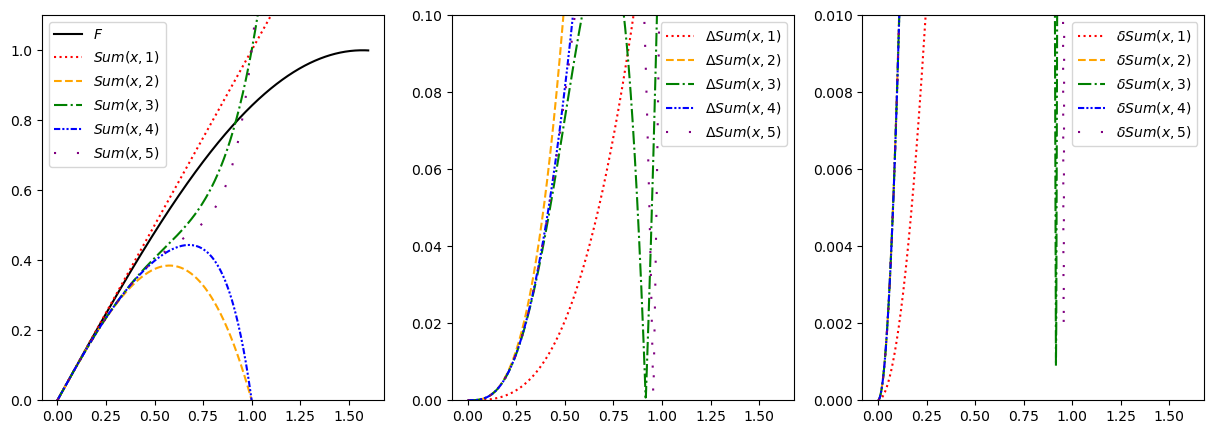

In [9]:
a = 0.0
b = 1.6
c = (a + b)/2
x_data = np.linspace(a, b, 1000)
x_data1 = np.linspace(zero, b, 1000)

#делаем рисунок из двух графиков
fig,axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_ylim([0,1.1])

#рисуем на первом графике F
axs[0].plot(x_data, F(x_data), label = '$F$', color = "black")

#задаем кортеж из стилей линий и кортеж для цветов
line_styles = ('dotted', 'dashed','dashdot',(0, (3, 1, 1, 1, 1, 1)),(0, (1, 10)))
colors = ('red','orange','green','blue','purple')

#в цикле рисуем суммы первых 5 челенов на первом графике
for i in range(1,6):
    axs[0].plot(x_data, Sum_Taylor(x_data, i), label = f'$Sum(x,{i})$', ls=line_styles[i-1], color=colors[i-1])

axs[0].legend()

axs[1].set_ylim([0,0.1])

#в цикле рисуем график абсолютной погрешности на втором графике
for i in range(1,6):
    axs[1].plot(x_data, AbsErr(x_data,i),label=f'$\Delta Sum(x,{i})$', ls=line_styles[i-1], color=colors[i-1])
axs[1].legend()

axs[2].set_ylim([0,0.01])

#в цикле рисуем график относительной погрешности на третьем графике
for i in range(1,6):
    axs[2].plot(x_data1, RelErr(x_data1,i),label=f'$\delta Sum(x,{i})$', ls=line_styles[i-1], color=colors[i-1])
axs[2].legend()

In [10]:
#Определить количество членов ряда N, при котором величина относительной погрешности в средней 
#точке отрезка станет меньше машинного эпсилон.  Величину  относительной погрешности вычислять 
#как  отношение прибавляемого члена к накопленной частичной сумме , взятое по модулю.

#относительная погрешность
def RelErr1(x, n) :
    return np.abs(Taylor(x,n)/Sum_Taylor(x, n))

n=1
while RelErr1(c,n)>=eps:
    n+=1
print(n)

83


[(0.0, 1e-14)]

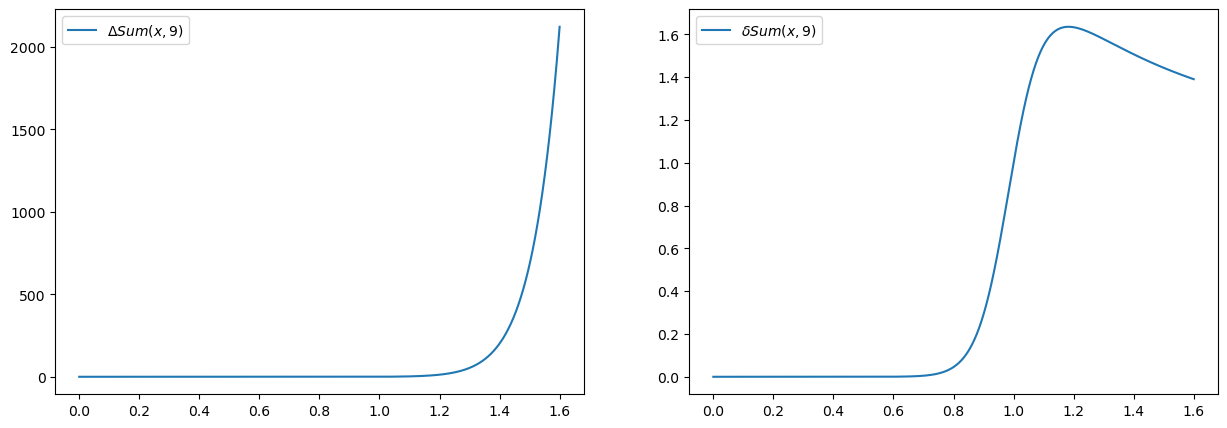

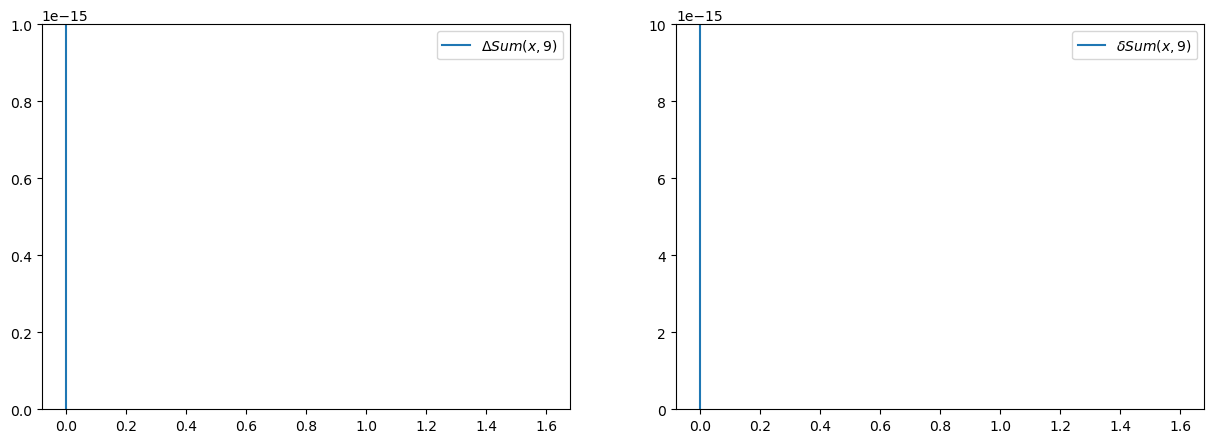

In [11]:
a = 0.0
b = 1.6
c = (a + b)/2
x_data = np.linspace(a, b, 1000)
x_data1 = np.linspace(zero, b, 1000)
N = 9

fig, axs = plt.subplots(1, 2, figsize = (15, 5))

 
axs[0].plot(x_data, AbsErr(x_data, N),label=f'$\Delta Sum(x,{N})$')
axs[0].legend()


axs[1].plot(x_data1, RelErr1(x_data1, N),label=f'$\delta Sum(x,{N})$')
axs[1].legend()


fig, axs1 = plt.subplots(1, 2, figsize = (15, 5))

 
axs1[0].plot(x_data, AbsErr(x_data, 9),label=f'$\Delta Sum(x,{N})$')
axs1[0].legend()
axs1[0].set(ylim=(0.0, 1e-15))

axs1[1].plot(x_data1, RelErr(x_data1, 9),label=f'$\delta Sum(x,{N})$')
axs1[1].legend()
axs1[1].set(ylim=(0.0, 1e-14))

In [14]:
def round(x,t):
    return np.float32(np.format_float_scientific(x, precision = t-1))

def S_round(x, N, t):
    res = x
    a = x
    for i in range(2,N+1,2):
        a *= x**2
        a = (-1) * a/(i*(i+1))
        res =  res + round(a,t)
        res = round(res,t)
    return res

def Sum_round(x, N, t):
    res = x.copy()
    for i in range(len(x)):
        res[i] = S_round(x[i], N, t)
    return res

In [15]:
S_round(np.math.pi/2,45,16)

0.99999994

In [16]:
np.math.pi/2

1.5707963267948966

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\783507676.py:14: RuntimeWarning: divide by zero encountered in divide
  return RAbsErr(x,n,t)/np.abs(Sum_round(x, n,t))


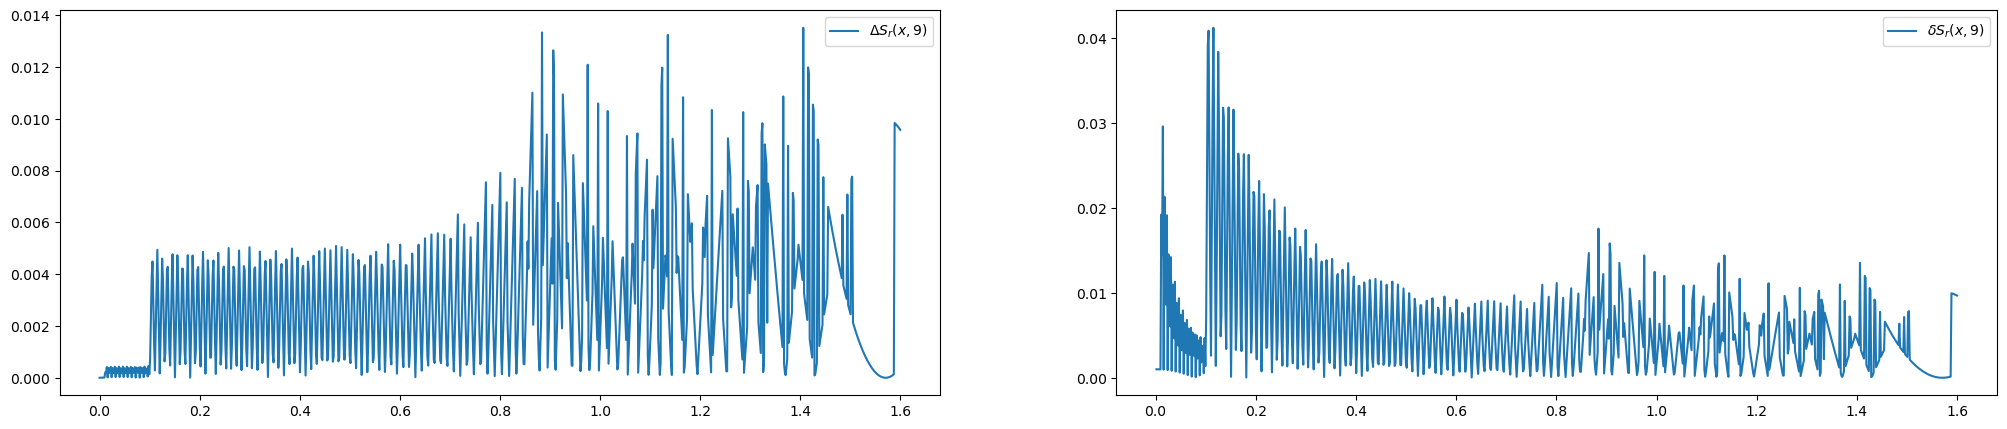

In [17]:
a = 0.0
b = 1.6
c = (a + b)/2
x_data1 = np.linspace(a, b, 1000)
x_data1 = np.linspace(zero, b, 1000)


#абсолютная погрешность округленных значений
def RAbsErr(x, n, t) :
    return np.abs(F(x) - Sum_round(x, n, t))

#относительная погрешность округленных значений
def RRelErr(x, n, t) :
    return RAbsErr(x,n,t)/np.abs(Sum_round(x, n,t))


fig, axs = plt.subplots(1, 2, figsize = (25, 5))
#np.abs(F(x_data) - Sum_round(x_data1, 9, 2))
#np.abs(F(x_data1)-Sum_round(x_data1, 9, 2))/np.abs(Sum_Taylor(x_data1,9)) 
axs[0].plot(x_data,RAbsErr(x_data,9,2),label=f'$\Delta S_r(x,{N})$')
axs[0].legend()

axs[1].plot(x_data1,RRelErr(x_data1,9,2) ,label=f'$\delta S_r(x,{N})$')
axs[1].legend()